In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts


In [137]:
sales=pd.read_csv('Store.csv')

In [138]:
sales.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [22]:
sales.shape

(932, 10)

In [25]:
sales.isnull().sum()

Observation             0
Dist_Taxi               0
Dist_Market             0
Dist_Metro              0
Store_Area              0
Items_Available         0
Parking                 0
Coupon_Category         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [24]:
### treating missing values
sales['Dist_Taxi'].fillna(sales.Dist_Taxi.median(),inplace=True)
sales['Dist_Market'].fillna(sales.Dist_Market.median(),inplace=True)
sales['Items_Available'].fillna(sales.Items_Available.median(),inplace=True)
sales['Store_Area'].fillna(sales.Store_Area.median(),inplace=True)
sales['Dist_Metro'].fillna(sales.Dist_Metro.median(),inplace=True)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


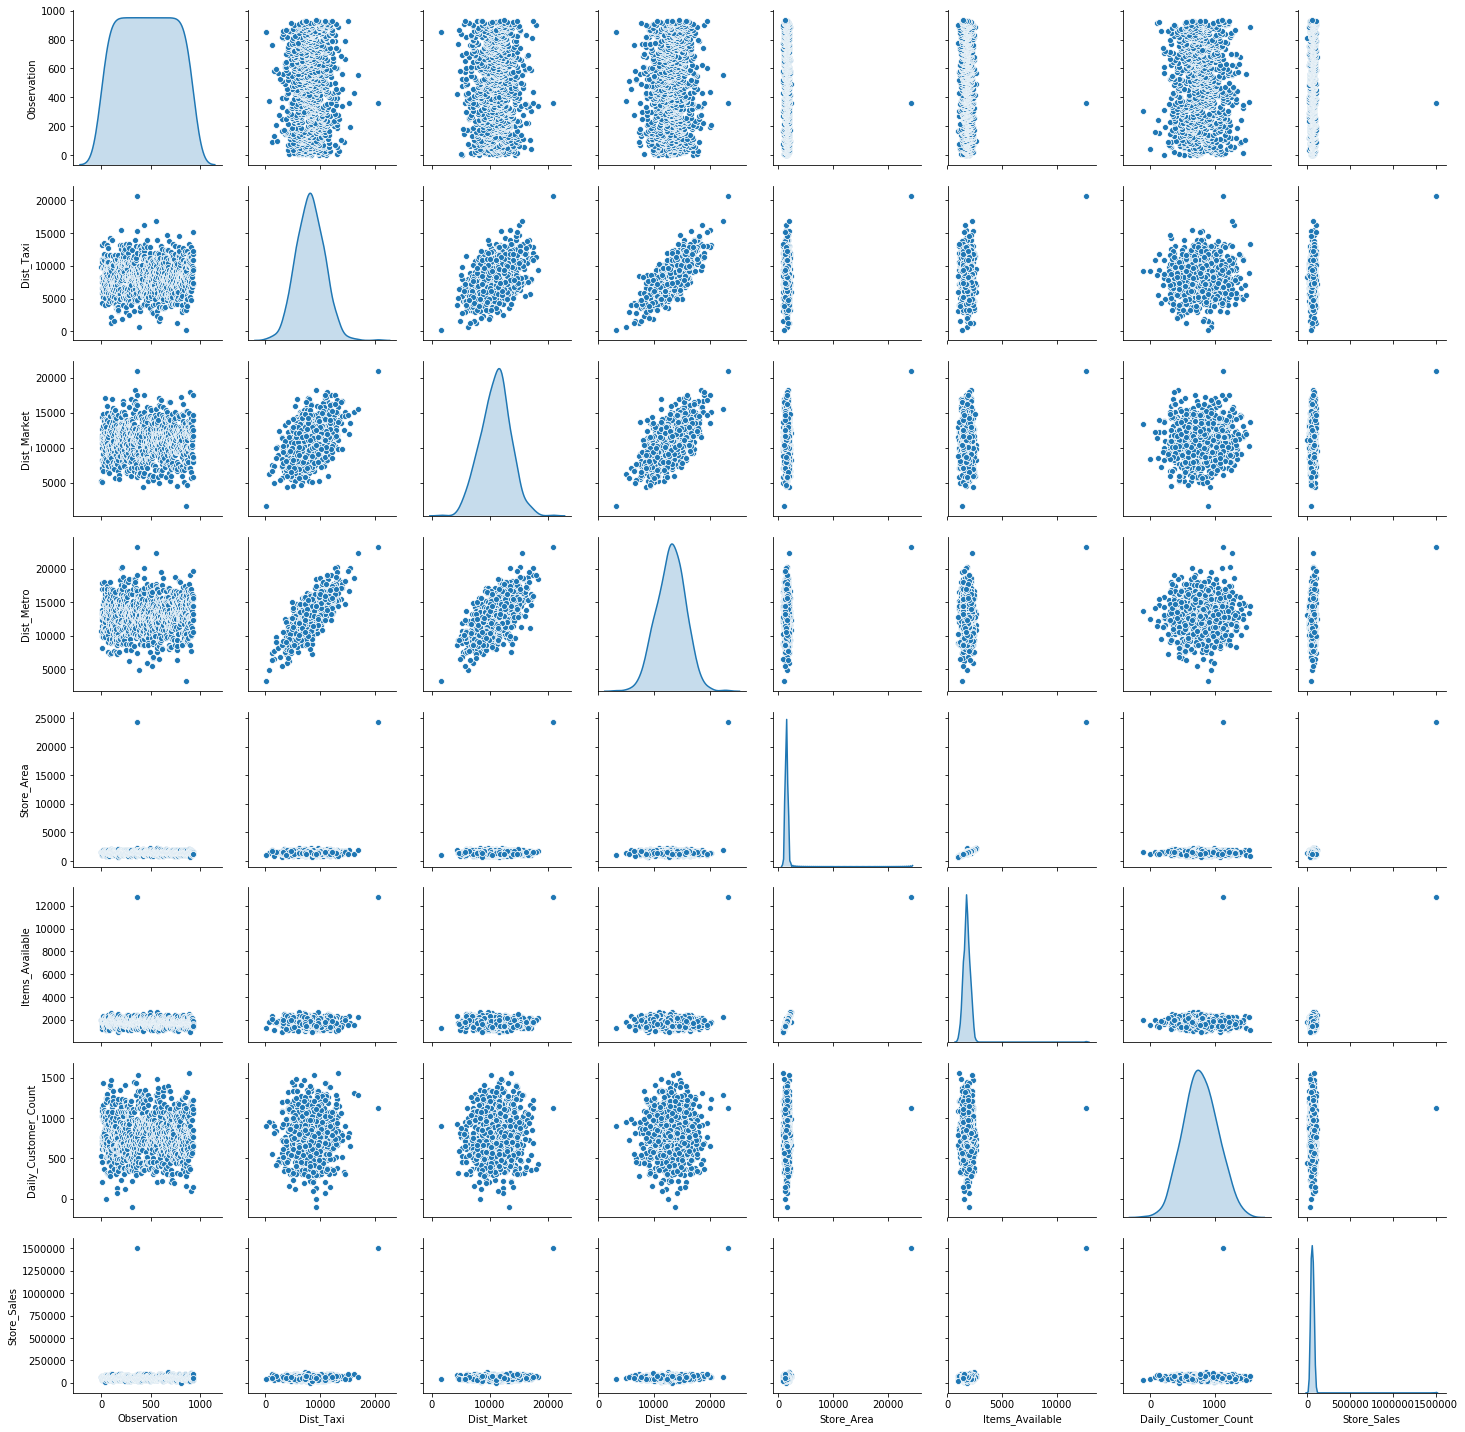

In [30]:
sns.pairplot(sales,diag_kind='kde')
plt.show()

In [34]:
sales[sales.Store_Area==max(sales.Store_Area)]

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
490,491,6063.0,8269.0,10928.0,2229.0,2667.0,Covered,CAT A,660,87410


In [33]:
sales.drop(360,axis=0,inplace=True)

In [35]:
sales.Parking.value_counts()


Open            372
Not Provided    227
Covered         187
No Parking      145
Name: Parking, dtype: int64

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


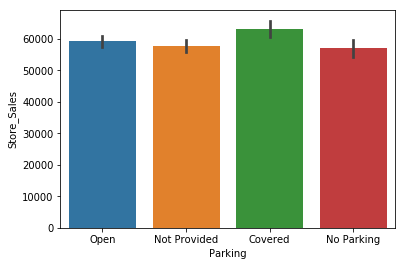

In [37]:
sns.barplot(x=sales.Parking,y=sales.Store_Sales,data=sales)
plt.show()# the black point is that the confidence interval of the mean

In [40]:
sales['Store_Sales'].groupby(sales.Parking).mean()

Parking
Covered         63109.732620
No Parking      56994.620690
Not Provided    57747.048458
Open            59233.978495
Name: Store_Sales, dtype: float64

In [55]:
63109.732620-57747.048458


5362.684162000005

# ANOVA Test

In [42]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Store_Sales ~ Parking', data =sales ).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
Parking     3.0  4.033839e+09  1.344613e+09  4.553203  0.003557
Residual  927.0  2.737537e+11  2.953114e+08       NaN       NaN


# Two sample T-test

In [49]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power

sales_cover=sales.Store_Sales[sales.Parking=='Covered']
sales_not_provi=sales.Store_Sales[sales.Parking=='Not Provided']


In [52]:
t_statistic, p_value  =  stats.ttest_ind(sales_not_provi,sales_cover)
print('P Value %f' % p_value) 
print('tstats is %f'%t_statistic)


P Value 0.001750
tstats is -3.150238


In [53]:
0.001750/2

0.000875

In [54]:
1-p_value

0.9982496477050127

# Relationship between coupon nd parking  

In [57]:
sales.Coupon_Category.value_counts()

CAT B    364
CAT A    329
CAT C    238
Name: Coupon_Category, dtype: int64

In [69]:
sales['Store_Sales'].groupby(sales.Coupon_Category).mean()

Coupon_Category
CAT A    73998.662614
CAT B    55233.214286
CAT C    45205.504202
Name: Store_Sales, dtype: float64

In [61]:
coup_park_arr=pd.crosstab(sales.Coupon_Category,sales.Parking)
coup_park_arr

Parking,Covered,No Parking,Not Provided,Open
Coupon_Category,,,,
CAT A,75,51,82,121
CAT B,63,53,89,159
CAT C,49,41,56,92


In [62]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(coup_park_arr)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 5.59851 P value 0.469631 Degrees of freedom 6


In [63]:
stats.chi2_contingency(coup_park_arr)

(5.598509055616617,
 0.4696314046542073,
 6,
 array([[ 66.08270677,  51.2406015 ,  80.21804511, 131.45864662],
        [ 73.11278195,  56.69172932,  88.7518797 , 145.44360902],
        [ 47.80451128,  37.06766917,  58.03007519,  95.09774436]]))

In [76]:
sales['Store_Sales'].groupby(sales.Coupon_Category).mean()

Coupon_Category
CAT A    73998.662614
CAT B    55233.214286
CAT C    45205.504202
Name: Store_Sales, dtype: float64

In [71]:
mod = ols('Store_Sales ~ Parking + Coupon_Category + Parking:Coupon_Category', data =sales ).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                               sum_sq     df           F         PR(>F)
Parking                  3.023414e+09    3.0    6.161800   3.792762e-04
Coupon_Category          1.233702e+11    2.0  377.147746  2.581362e-120
Parking:Coupon_Category  7.474572e+07    6.0    0.076167   9.983139e-01
Residual                 1.503087e+11  919.0         NaN            NaN


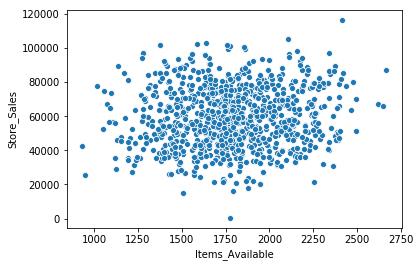

In [77]:
sns.scatterplot(x='Items_Available',y='Store_Sales',data=sales)
plt.show()

In [78]:
sales.Items_Available.mean()

1782.842105263158

In [79]:
less=sales[sales.Items_Available<1782]
more=sales[sales.Items_Available>1782]

In [81]:
less.Store_Sales.mean()

58394.751037344395

In [84]:
more.Store_Sales.mean()

60274.1425389755

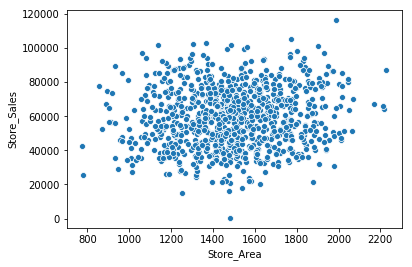

In [85]:
sns.scatterplot(x='Store_Area',y='Store_Sales',data=sales)
plt.show()

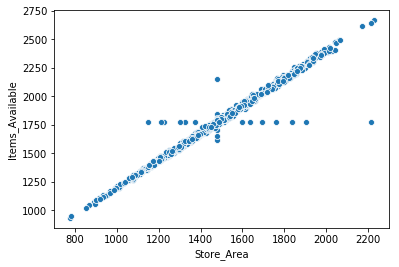

In [86]:
sns.scatterplot(x='Store_Area',y='Items_Available',data=sales)
plt.show()

In [88]:
sales.Store_Area.mean()

1487.1160042964555

In [89]:
area_less=sales[sales.Store_Area<1488]
area_more=sales[sales.Store_Area>1488]

In [96]:
t_statistic, p_value  =  stats.ttest_ind(area_less.Store_Sales,area_more.Store_Sales)
print('P Value %f' % p_value) 
print('tstats is %f'%t_statistic)


P Value 0.029017
tstats is -2.186650


In [107]:
from sklearn.linear_model import LinearRegression
x=sales[['Daily_Customer_Count']]
y=sales.Store_Sales
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
from statsmodels.api import add_constant
x2=add_constant(x)
lrn=sm.OLS(y,x2).fit()
print(lrn.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1676
Date:                Thu, 21 Feb 2019   Prob (F-statistic):              0.682
Time:                        15:25:31   Log-Likelihood:                -10405.
No. Observations:                 931   AIC:                         2.081e+04
Df Residuals:                     929   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.861e+04 

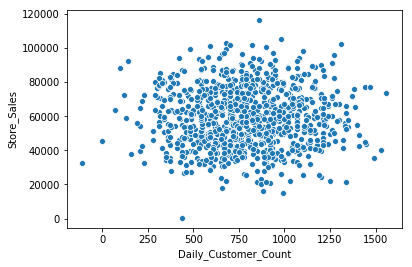

In [106]:
sns.scatterplot(x='Daily_Customer_Count',y='Store_Sales',data=sales)
plt.show()

In [129]:
df=pd.get_dummies(sales)
df.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,Coupon_Category_CAT A,Coupon_Category_CAT B,Coupon_Category_CAT C
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,530,66490,0,0,0,1,0,1,0
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,210,39820,0,0,1,0,0,1,0
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,720,54010,0,0,1,0,1,0,0
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,620,53730,1,0,0,0,0,1,0
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,450,46620,0,0,1,0,0,1,0


In [143]:
from sklearn.linear_model import LinearRegression
x=df.drop(['Store_Sales','Observation','Items_Available','Daily_Customer_Count'],axis=1)
y=df.Store_Sales
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [144]:
from statsmodels.api import add_constant
x2=add_constant(x)
lrn=sm.OLS(y,x2).fit()
print(lrn.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     96.97
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          7.27e-127
Time:                        15:51:53   Log-Likelihood:                -10094.
No. Observations:                 931   AIC:                         2.021e+04
Df Residuals:                     921   BIC:                         2.026e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.286e+

In [123]:
mod = ols('Daily_Customer_Count ~ Parking', data =sales ).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

             df        sum_sq        mean_sq         F    PR(>F)
Parking     3.0  3.641704e+05  121390.129005  1.726782  0.159852
Residual  927.0  6.516666e+07   70298.450669       NaN       NaN


In [124]:
mod = ols('Daily_Customer_Count ~ Coupon_Category', data =sales ).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                    df        sum_sq       mean_sq         F    PR(>F)
Coupon_Category    2.0  6.617100e+04  33085.499961  0.469006  0.625772
Residual         928.0  6.546466e+07  70543.818057       NaN       NaN


In [126]:
sales['Daily_Customer_Count'].groupby(sales.Coupon_Category).mean()

Coupon_Category
CAT A    796.018237
CAT B    782.005495
CAT C    775.168067
Name: Daily_Customer_Count, dtype: float64